# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jacimovic (15278247), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [2]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import custom modules
import vis_tools as vt
import dla_model as dm
import dla_simulation as ds
import cs_measures as csm

from importlib import reload

## 2. Flow Functions

In [4]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\dla_model.py'>

Animation movie is 30497970 bytes, exceeding the limit of 20971520.0. If you're sure you want a large animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB).


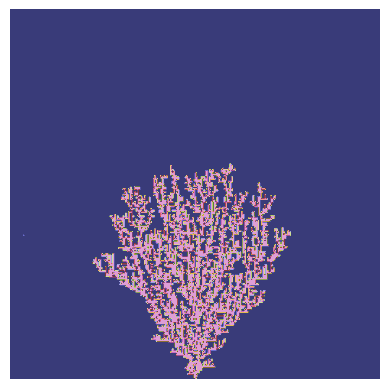

In [5]:
# Time / space parameters
size = 256
steps = 5000

# Environment parameters
Moore = False
obstacle = None
# drift_vec = [0, 0, -1]
# sun_vec = [0, 0, -1]
# periodic = (False, False, False)
drift_vec = [0, -1]
sun_vec = [0, -1]
periodic = (False, False)

# Initialize lattice
seeds = np.array([(int(size/2), 0)])
# seeds = np.array([(int(size/2), int(size/2), 0)])
lattice = dm.init_lattice(size, seeds)

# Initialize obstacle lattice
if obstacle is not None:
    boxes = np.array([[15,17,19,35,10,20], [40, 45, 50, 55, 60, 55]])
    obstacle = dm.init_obstacle_lattice(size, boxes=boxes, seed_coords=seeds)
    print(np.sum(obstacle))

# Initialize particles
particle_density = 0.1
particles = dm.init_particles(lattice, particle_density, obstacles=obstacle)

# Arrays for storing time frames
# lattice_frames = np.empty((steps, size, size, size))
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=periodic, moore=Moore, obstacles=obstacle, drift_vec=drift_vec, regen_bndry=False)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None, moore=Moore, obstacles=obstacle, sun_vec=sun_vec)
    # print(f"step {step}: {current_lattice}")

# vt.animate_lattice(lattice_frames, interval=100)
vt.animate_lattice((lattice_frames*5 + particles_frames)/6, interval=100)
# obstacle_frames = np.array([obstacle for _ in lattice_frames])
# vt.animate_lattice((lattice_frames*5 + particles_frames + obstacle*2)/8, interval=100)

## 3. Fractal Dimension

In [30]:
# Reload modules
reload(csm)
reload(vt)

<module 'vis_tools' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

256
[2.         1.5        1.4406427  1.51109853 1.54421984 1.58856358
 1.59721869 1.55864163]


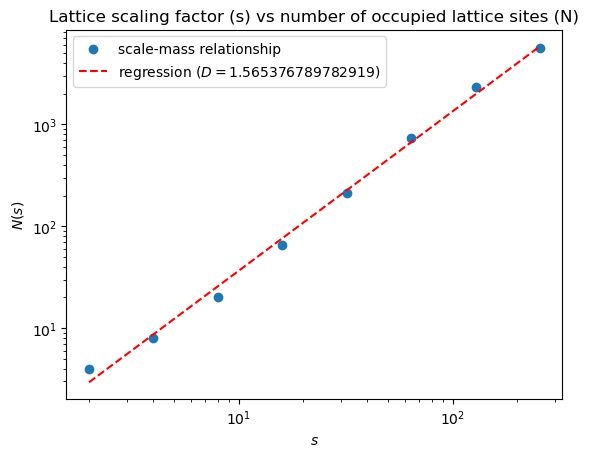

In [31]:
print(current_lattice.shape[0])
fractal_dims, scales, n_boxes, coeffs = csm.fractal_dimension_clusters(current_lattice)

print(fractal_dims)

vt.plot_fractal_dimension(scales, n_boxes, coeffs)

## 4. Branching Distribution

In [495]:
reload(csm)
reload(vt)

<module 'vis_tools' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


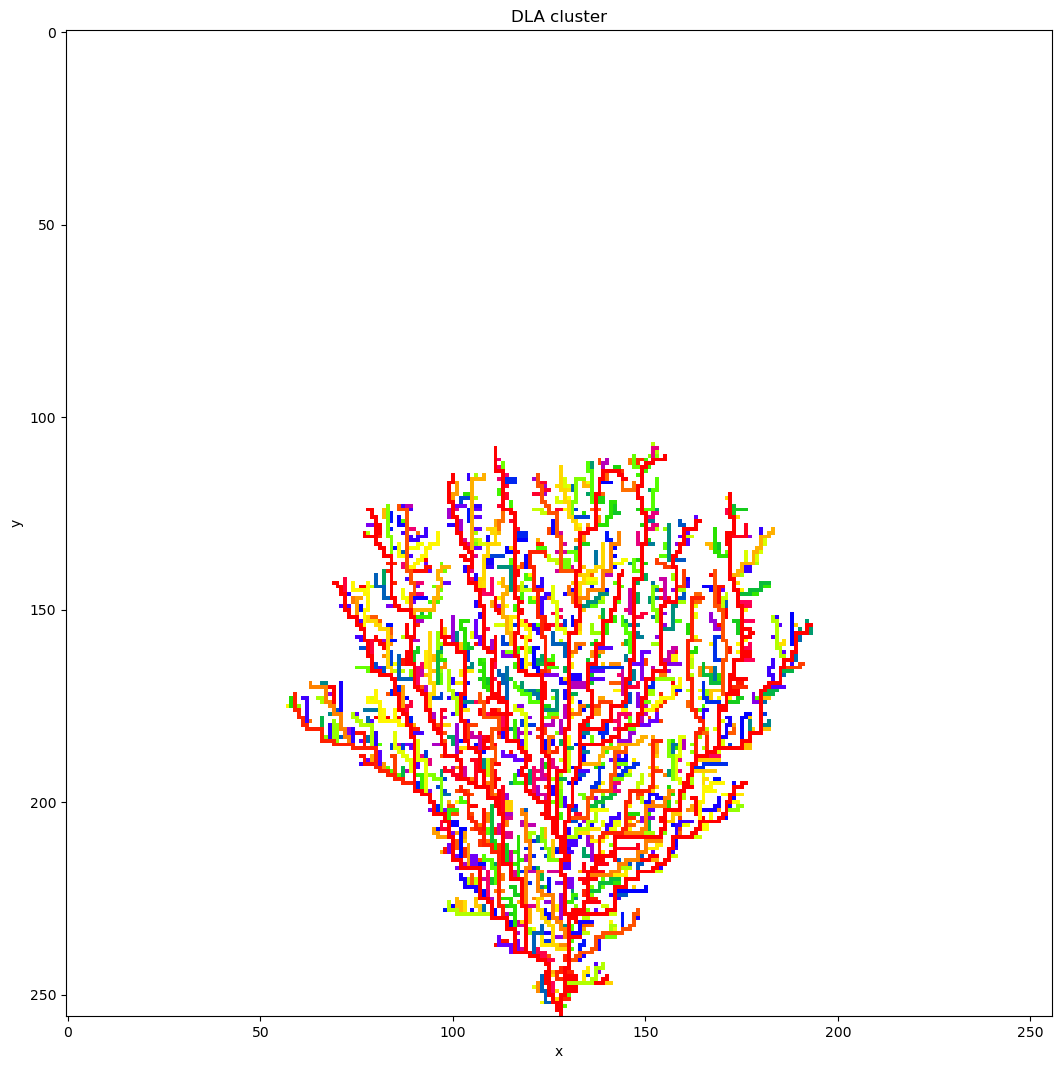

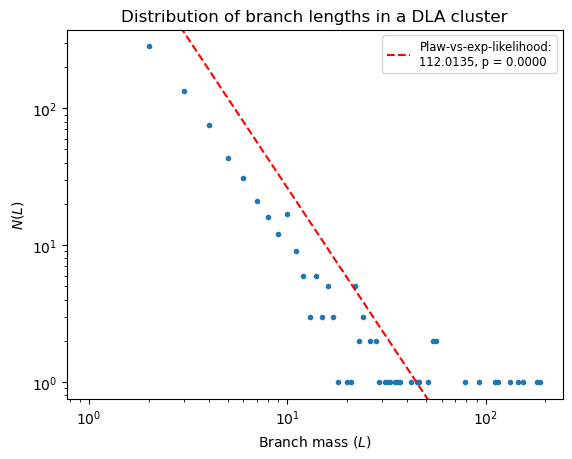

In [496]:
branch_lengths_unique, branch_length_counts, branches = csm.branch_distribution(current_lattice, seeds[0])
vt.plot_lattice(current_lattice, branches)
vt.plot_branch_length_distribution(branch_lengths_unique, branch_length_counts, branches)

## 5. Run Simulation Series

In [3]:
# Reload modules
reload(dm)
reload(ds)
reload(csm)
reload(vt)

<module 'vis_tools' from 'c:\\Users\\Esthe\\OneDrive\\Documenten\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

In [86]:
# Define environment parameter series (2D setup)
lattice_size_series = np.array([64])
max_timesteps_series = np.array([2000])
seeds_series = np.array([[[32, 0]]])
particle_density_series = np.array([0.1])
target_mass_series = np.array([int(0.01 * lattice_size_series[0]**2)])
obstacle_box_series = np.array([None])
drift_vec_series = np.array([[0, -0.01], [0, -0.1], [0, -1],[0, -10], [0, -100]])
sun_vec_series = np.array([[0, -1]])

# Define environment parameter series (3D setup)
# lattice_size_series = np.array([128])
# max_timesteps_series = np.array([2000])
# seeds_series = np.array([[[32, 32, 0]]])
# particle_density_series = np.array([0.1])
# target_mass_series = np.array([int(0.025 * lattice_size_series[0]**3),
#                                int(0.05 * lattice_size_series[0]**3)])
# obstacle_box_series = np.array([None])
# drift_vec_series = np.array([[0, 0, -1]])
# sun_vec_series = np.array([[0, 0, -1]])

# Define fixed simulation parameters
fdim_measure = 'both' # fractal dimension, can be None / 'cgrain' / 'radius' / 'both
calc_branch_distr = True
calc_mass = True
periodic = (False, False, False)
move_moore = False
aggr_moore = False
regen_mode = None

# Run simulations
n_sims = 30
sim_results, dla_evolutions = ds.analyse_dla_patterns(n_sims, lattice_size_series, max_timesteps_series, seeds_series, particle_density_series, target_mass_series,
                                                           obstacle_box_series=obstacle_box_series, drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series,
                                                           fdim_measure=fdim_measure, calc_branch_distr=calc_branch_distr, calc_mass=calc_mass,
                                                           n_saved_sims=1, periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

Running parameters: lattice_size: 64; max_timesteps: 2000; seeds: [[32  0]]; particle_density: 0.1; target_mass: 40; obstacle_boxes: None; drift_vec: [ 0.   -0.01]; sun_vec: [ 0 -1]
Running simulation 1 of 30
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.5  0.   0.25 0.25]
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.5  0.   0.25 0.25]
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.5  0.   0.25 0.25]
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.5  0.   0.25 0.25]
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.5  0.   0.25 0.25]
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.5  0.   0.25 0.25]
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.5  0.   0.25 0.25]
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.5  0.   0.25 0.25]
weights drift:  [0.2475 0.2525 0.25   0.25  ]
weights aggregation:  [0.

,lattice_size,max_timesteps,seeds,particle_density,target_mass,obstacle_boxes,drift_vec,sun_vec,sim_measures,evol_ref
0,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -0.01]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.0
1,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -0.01]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 2.0, 2.0, 2.0,...",NaN
2,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -0.01]","[0, -1]","{'mass_series': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",NaN
3,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -0.01]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0,...",NaN
4,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -0.01]","[0, -1]","{'mass_series': [1.0, 1.0, 2.0, 3.0, 3.0, 3.0,...",NaN
...,...,...,...,...,...,...,...,...,...,...
145,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -100.0]","[0, -1]","{'mass_series': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",NaN
146,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -100.0]","[0, -1]","{'mass_series': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",NaN
147,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -100.0]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 2.0, 3.0, 3.0,...",NaN
148,64,2000,"[[32, 0]]",0.1,40,None,"[0.0, -100.0]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN


In [52]:
sim_results.to_json('sim_results.json')

## 6. Analyse Simulation Results

In [9]:
reload(ds)
reload(vt)
reload(csm)

<module 'cs_measures' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\cs_measures.py'>

(128, 0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


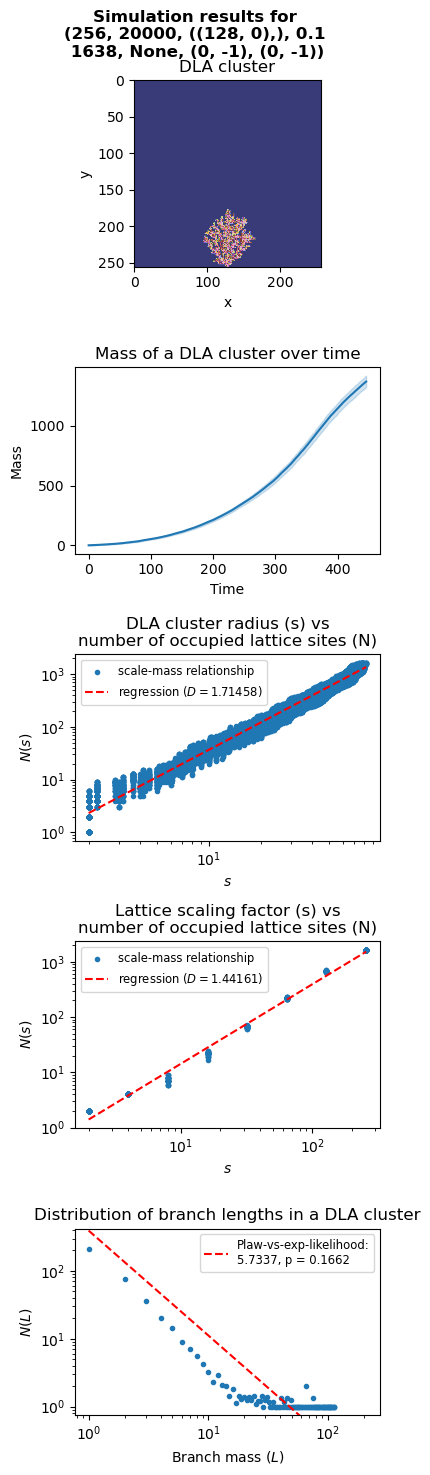

(128, 0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


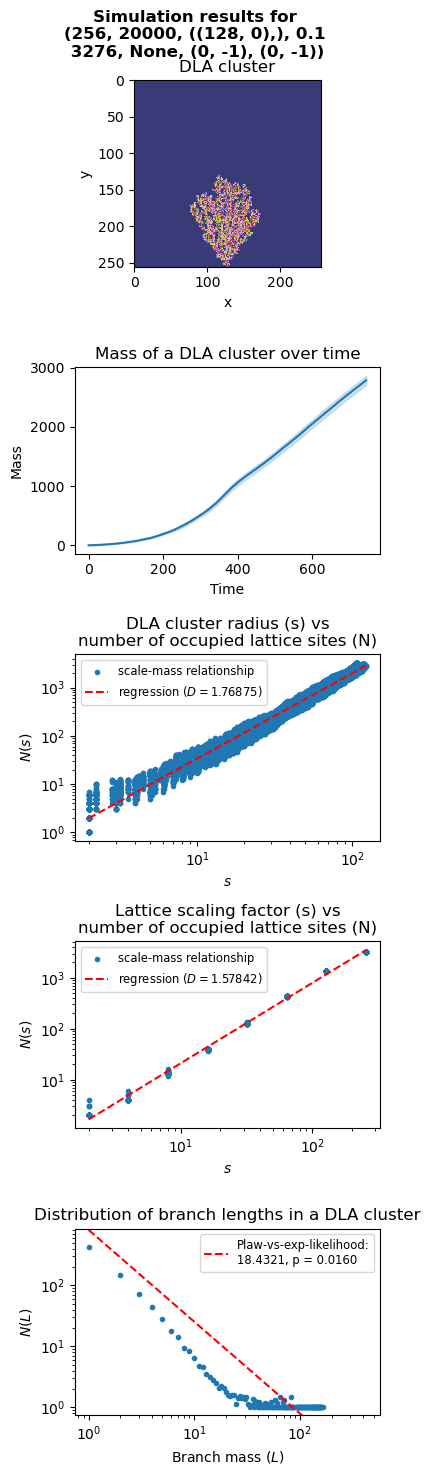

In [6]:
ds.analyse_sim_results(sim_results, dla_evolutions=dla_evolutions)

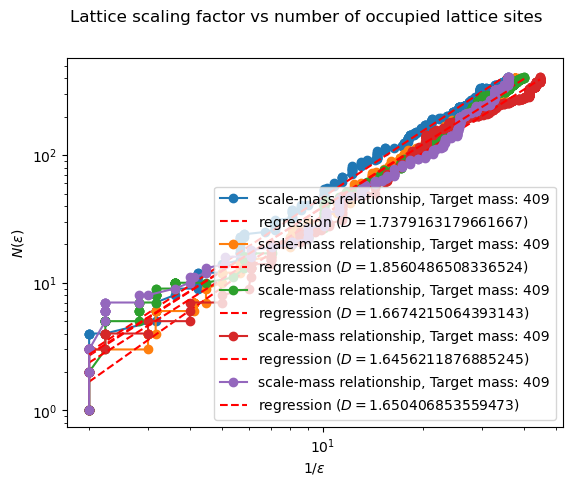

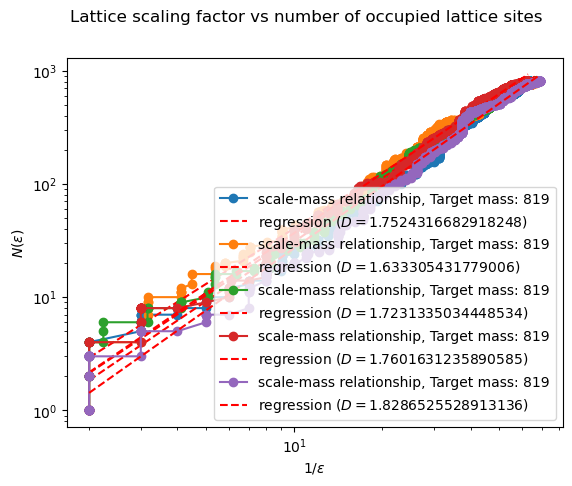

In [50]:
# Unpack results
# scale_series_results = [sr['scale_series'] for sr in sim_results]



for tm in target_mass_series:
    results_filtered = [sr for sr in sim_results if sr['target_mass'] == tm]
    fig, ax = plt.subplots()
    for rf in results_filtered:
        scale_series_results = rf['scale_series']
        n_boxes_results = rf['n_box_series']
        coeffs_results = rf['coeffs']
        vt.plot_fractal_dimension(scale_series_results, n_boxes_results, coeffs_results, ax=ax, label=f", Target mass: {tm}")

plt.show()

## 7. Analyse Environmental Parameters

In [99]:
reload(ds)
reload(vt)
reload(csm)

<module 'cs_measures' from 'c:\\Users\\Esthe\\OneDrive\\Documenten\\GitHub\\complex-system-simulation\\Project\\Code\\cs_measures.py'>

In [59]:
sim_results

,lattice_size,max_timesteps,seeds,particle_density,target_mass,obstacle_boxes,drift_vec,sun_vec,sim_measures,evol_ref
0,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -0.01]","{'mass_series': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0.0
1,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -0.01]","{'mass_series': [1.0, 2.0, 3.0, 3.0, 4.0, 5.0,...",NaN
2,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -0.01]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0,...",NaN
3,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -0.01]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0,...",NaN
4,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -0.01]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
...,...,...,...,...,...,...,...,...,...,...
85,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -1.0]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
86,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -1.0]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
87,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -1.0]","{'mass_series': [1.0, 1.0, 1.0, 2.0, 2.0, 2.0,...",NaN
88,64,1000,"[[32, 0]]",0.1,204,None,"[0, -1]","[0.0, -1.0]","{'mass_series': [1.0, 1.0, 1.0, 2.0, 2.0, 2.0,...",NaN


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


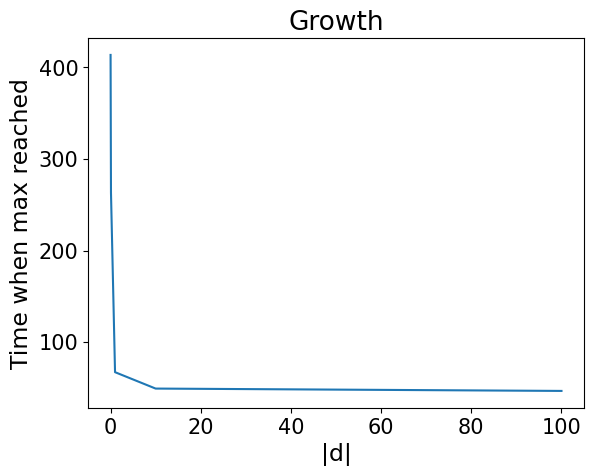

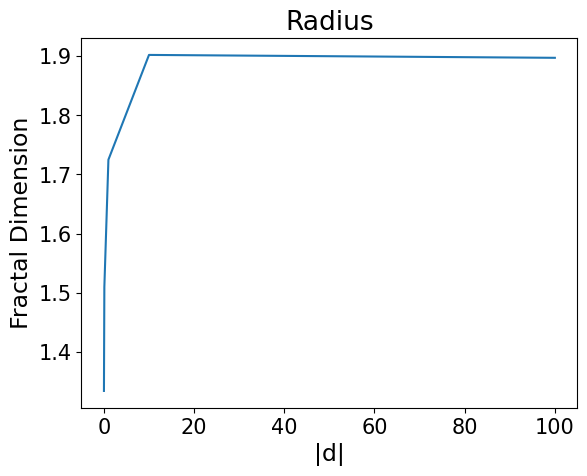

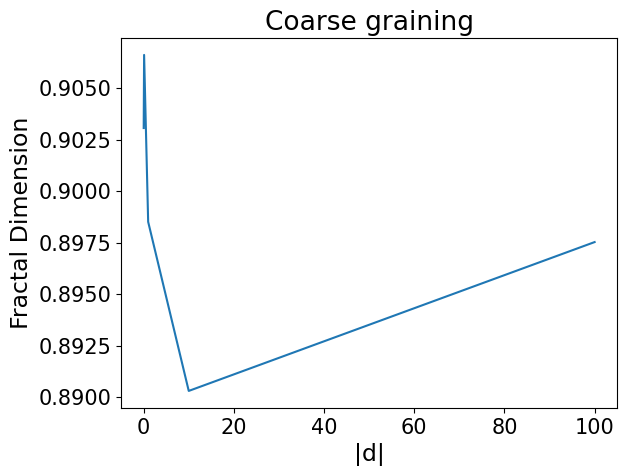

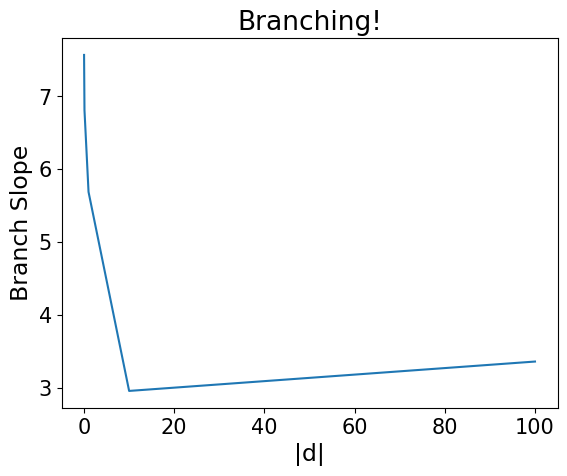

In [100]:
ds.plot_environmental_params(sim_results, plot_sun=False, plot_drift_norm=True, growth=True, fdr=True, fdc=True, branch=True)